In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|██████████| 25.7M/25.7M [00:01<00:00, 15.2MB/s]

Extracting files...


Path to dataset files: C:\Users\48664\.cache\kagglehub\datasets\lakshmi25npathi\imdb-dataset-of-50k-movie-reviews\versions\1


C:\Users\48664\AppData\Local\Temp\ipykernel_17480\3820201885.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1
The server reported the following issues: Data not found
Please make sure you specified the correct resource identifiers.

In [23]:
# Załaduj recenzje filmów z pliku tekstowego:
with open("C:/Users/48664/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv", encoding="utf-8") as f:
    texts = [line.strip() for line in f if line.strip()]



In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Jeśli masz już swoją listę recenzji:
# texts = ["recenzja1", "recenzja2", ...] 

vectorizer = TfidfVectorizer(max_features=1000)  # jeśli recenzje są po polsku
tfidf_matrix = vectorizer.fit_transform(texts)

# Zamiana macierzy na tablicę numpy i wyświetlenie
print(tfidf_matrix.toarray())

# Lista słów (cech) odpowiadających kolumnom macierzy
feature_names = vectorizer.get_feature_names_out()

# Wyświetlenie słów i ich indeksów (czyli numeru kolumny w tfidf_matrix)
for idx, word in enumerate(feature_names):
    print(f"{idx}: {word}")

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.0493831  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.13053992 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
0: 10
1: 20
2: 30
3: 80
4: able
5: about
6: above
7: absolutely
8: across
9: act
10: acted
11: acting
12: action
13: actor
14: actors
15: actress
16: actual
17: actually
18: add
19: admit
20: after
21: again
22: against
23: age
24: ago
25: agree
26: air
27: all
28: almost
29: alone
30: along
31: already
32: also
33: although
34: always
35: am
36: amazing
37: america
38: american
39: among
40: an
41: and
42: animation
43: annoying
44: another
45: any
46: anyone
47: anything
48: anyway
49: apart
50: apparently
51: appear
52: appears
53: are
54: aren
55

In [25]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Pobierz tokenizer do pierwszego uruchomienia
nltk.download('punkt')

# Tokenizacja: każde zdanie zamieniamy na listę słów
sentences = [doc.lower().split() for doc in texts]

# Tworzymy model Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)  # min_count=1 żeby działało nawet na małym zbiorze

# Przykładowe porównanie podobieństwa semantycznego między słowami:
print("Podobieństwo 'film' i 'aktor':", model.wv.similarity('film', 'actor'))  # wartości od -1 do 1

# Najbardziej podobne słowa do 'film'
print("Najbardziej podobne do 'film':")
print(model.wv.most_similar('film'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\48664\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Podobieństwo 'film' i 'aktor': 0.28382948
Najbardziej podobne do 'film':
[('movie', 0.9356885552406311), ('film,', 0.8330124020576477), ('movie,', 0.7946683168411255), ('picture', 0.7600222229957581), ('documentary', 0.7470920085906982), ('flick', 0.7100483179092407), ('film.', 0.6997456550598145), ('film;', 0.6779513955116272), ('movie.', 0.6671057343482971), ('series', 0.63448166847229)]


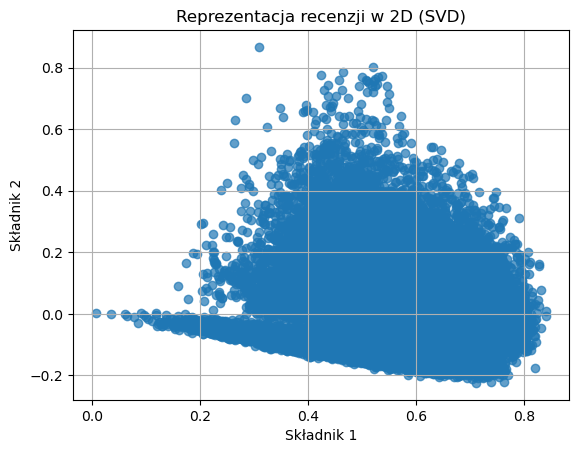

In [26]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Redukcja wymiarowości do 2D
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(tfidf_matrix)

# Rysowanie wykresu
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7)
plt.title("Reprezentacja recenzji w 2D (SVD)")
plt.xlabel("Składnik 1")
plt.ylabel("Składnik 2")
plt.grid(True)
plt.show()